# OpenAI Whisper Python Tutorial

## 1. Getting Started with OpenAI Whisper

### a. Install OpenAI Whisper Python Library

In [1]:
!pip install -U openai-whisper

### b. Load the OpenAI Whisper Model

In [2]:
import whisper
model = whisper.load_model("base")

## 2. Transcribing Audio

### a. Download & Transcribe Kaggle Data

https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition


In [3]:
result = model.transcribe("harvard.wav", verbose=True)
result['text']

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:04.000]  The stale smell of old beer lingers.
[00:04.000 --> 00:07.000]  It takes heat to bring out the odor.
[00:07.000 --> 00:10.000]  A cold dip restores health and zest.
[00:10.000 --> 00:12.000]  A salt pickle tastes fine with ham.
[00:12.000 --> 00:15.000]  Tacos al pastor are my favorite.
[00:15.000 --> 00:44.000]  A zestful food is the hot cross bun.


' The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.'

### b. Process the Response

In [4]:
result['segments']

[{'id': 0,
  'seek': 0,
  'start': 0.0,
  'end': 4.0,
  'text': ' The stale smell of old beer lingers.',
  'tokens': [440, 342, 1220, 4316, 295, 1331, 8795, 22949, 433, 13],
  'temperature': 0.0,
  'avg_logprob': -0.1840377352130947,
  'compression_ratio': 1.4210526315789473,
  'no_speech_prob': 0.05561279505491257},
 {'id': 1,
  'seek': 0,
  'start': 4.0,
  'end': 7.0,
  'text': ' It takes heat to bring out the odor.',
  'tokens': [467, 2516, 3738, 281, 1565, 484, 264, 41176, 13],
  'temperature': 0.0,
  'avg_logprob': -0.1840377352130947,
  'compression_ratio': 1.4210526315789473,
  'no_speech_prob': 0.05561279505491257},
 {'id': 2,
  'seek': 0,
  'start': 7.0,
  'end': 10.0,
  'text': ' A cold dip restores health and zest.',
  'tokens': [316, 3554, 10460, 1472, 2706, 1585, 293, 37889, 13],
  'temperature': 0.0,
  'avg_logprob': -0.1840377352130947,
  'compression_ratio': 1.4210526315789473,
  'no_speech_prob': 0.05561279505491257},
 {'id': 3,
  'seek': 0,
  'start': 10.0,
  'end': 1

In [5]:
for i, seg in enumerate(result['segments']):
    print(i+1, "- ", seg['text'])

1 -   The stale smell of old beer lingers.
2 -   It takes heat to bring out the odor.
3 -   A cold dip restores health and zest.
4 -   A salt pickle tastes fine with ham.
5 -   Tacos al pastor are my favorite.
6 -   A zestful food is the hot cross bun.


In [6]:
import pandas as pd
speech = pd.DataFrame.from_dict(result['segments'])
speech.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob
0,0,0,0.0,4.0,The stale smell of old beer lingers.,"[440, 342, 1220, 4316, 295, 1331, 8795, 22949,...",0.0,-0.184038,1.421053,0.055613
1,1,0,4.0,7.0,It takes heat to bring out the odor.,"[467, 2516, 3738, 281, 1565, 484, 264, 41176, 13]",0.0,-0.184038,1.421053,0.055613
2,2,0,7.0,10.0,A cold dip restores health and zest.,"[316, 3554, 10460, 1472, 2706, 1585, 293, 3788...",0.0,-0.184038,1.421053,0.055613
3,3,0,10.0,12.0,A salt pickle tastes fine with ham.,"[316, 5139, 31433, 8666, 2489, 365, 7852, 13]",0.0,-0.184038,1.421053,0.055613
4,4,0,12.0,15.0,Tacos al pastor are my favorite.,"[38848, 329, 419, 21193, 366, 452, 2954, 13]",0.0,-0.184038,1.421053,0.055613


### c. Language Detection

In [7]:
audio = whisper.load_audio("harvard.wav")
audio = whisper.pad_or_trim(audio)

In [8]:
mel = whisper.log_mel_spectrogram(audio).to(model.device)
_, probs = model.detect_language(mel)
sorted(probs.items(), key=lambda x:x[1], reverse=True)[:10]

[('en', 0.9977269768714905),
 ('ja', 0.0006539151072502136),
 ('nn', 0.00031940656481310725),
 ('ko', 0.00021457935508806258),
 ('pt', 0.0001776816206984222),
 ('es', 0.00011555679520824924),
 ('la', 0.00010099961946252733),
 ('fr', 8.32807199913077e-05),
 ('haw', 7.064134842948988e-05),
 ('de', 6.923051114426926e-05)]

## 3. Earnings Call Mini-Project

### a. Get & Trim Microsoft's Audio Stream

#### i. Install PyTube

In [9]:
!pip install pytube

In [1]:
from pytube import YouTube

#### ii. Get Content Video & Audio Streams

In [2]:
youtube_video_url = "https://www.youtube.com/watch?v=3haowENzdLo"
youtube_video_content = YouTube(youtube_video_url)

#### iii. Download Audio Stream

In [12]:
audio_streams = youtube_video_content.streams.filter(only_audio = True)
for stream in audio_streams:
    print(stream)

<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">
<Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">
<Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">


In [13]:
audio_stream = audio_streams[1]
print(audio_stream)

<Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">


#### iv. Trim Audio with FFMPEG

In [14]:
!ffmpeg -version

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

In [15]:
# presentation starts from 32:04 and ends at 1:13:59 
# QA starts from 1:13:59
# https://www.metric-conversions.org/time/minutes-to-seconds.htm

b

### b. Transcribe Trimmed Audio

In [16]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("earnings_call_microsoft_q4_2022_filtered.mp4")
result["text"][:400]

' Good afternoon and thank you for joining us today. On the call with me are Satin Adela, Chairman and Chief Executive Officer, Amy Hood, Chief Financial Officer, Alice Chala, Chief Accounting Officer, and Keith Tholiver, Deputy General Counsel. On the Microsoft Invest Relations website, you can find our earnings press release and financial summary slide deck, which is intended to supplement our pr'

### c. Summarize Whisper-Transcription with GPT-3

#### i. Install & Load OpenAI
https://analyzingalpha.com/openai-api-python-tutorial

In [17]:
!pip install openai

In [18]:
import os
import openai
import pandas as pd

api_key = os.getenv('OPENAI_API_KEY')
openai.api_key = api_key

#### ii. Summarize Text

In [20]:
text = result['text'][:985]

summary = openai.Completion.create(
  model="text-davinci-003",
  prompt= text + "\n\nTl;dr",
  max_tokens= 200,
  temperature=0
)

print(summary['choices'][0]['text'])



On this call, Satin Adela (Chairman and CEO), Amy Hood (CFO), Alice Chala (Chief Accounting Officer), and Keith Tholiver (Deputy General Counsel) will discuss Microsoft's fourth quarter earnings. The Microsoft Investor Relations website has the earnings press release and financial summary slide deck, which provides a reconciliation of gap and non-gap financial measures. Unless otherwise specified, non-gap metrics will be used.


### d. Whisper Audio Sentiment Analysis Using GPT-3

#### i. Sentiment analysis of default Whisper Speech Segments

##### 1. Format speech segments

In [21]:
# convert earnings call response to pandas dataframe
earnings_callDF = pd.DataFrame.from_dict(result['segments']) 

# filter the text column and remove the remaining 
earnings_callDF = earnings_callDF[['text']] 

# randomly select 20 segments from the dataframe 
earnings_callDF = earnings_callDF.sample(n = 20) 
earnings_callDF.head()

,text
24,"If you ask a question, it will be included in..."
148,complexity. We are taking share across all ma...
182,relationships. Now on to gaming. We offer the...
170,consumption across start and categories like ...
371,we expect revenue growth in the mid to high t...


##### 2. Create and text function to analyze sentiment

In [23]:
text = "This year has been financially very profitable for us."
print(get_sentiment(text))

text = "We lost 20% of our worth in the last quarter ."
print(get_sentiment(text))

Positive
Negative


##### 3. Apply sentiment function to speech sentiments

In [24]:
# apply the get_sentiment() method on our earnings_calls dataframe

earnings_callDF['sentiment'] = earnings_callDF['text'].apply(get_sentiment)
earnings_callDF.head()

,text,sentiment
24,"If you ask a question, it will be included in...",Neutral
148,complexity. We are taking share across all ma...,Neutral
182,relationships. Now on to gaming. We offer the...,Positive
170,consumption across start and categories like ...,Neutral
371,we expect revenue growth in the mid to high t...,Positive


##### 4. Analyze Sentiment

In [25]:
print("text - ",earnings_callDF['text'].iloc[12])
print("sentiment - ",earnings_callDF['sentiment'].iloc[12])

text -   connect and play. Despite a changing market for PCs during the quarter, we continue to see more
sentiment -  Neutral


##### 5. Plot Sentiment

In [26]:
!pip install seaborn

Neutral     17
Positive     2
Negative     1
Name: sentiment, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

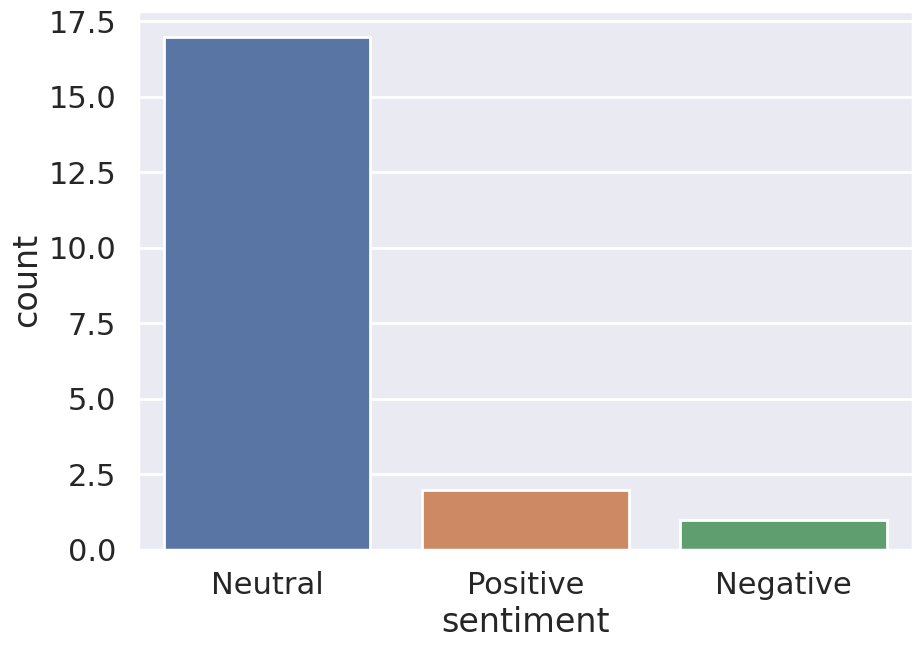

In [33]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("poster")

print(earnings_callDF['sentiment'].value_counts())
sns.countplot(x='sentiment', data = earnings_callDF)

In [39]:
print("text - ",earnings_callDF['text'].iloc[12])
print("sentiment - ",earnings_callDF['sentiment'].iloc[12])

text -   connect and play. Despite a changing market for PCs during the quarter, we continue to see more
sentiment -  Neutral


In [37]:
for i, seg in enumerate(result['segments'][100:110]):
  print(i+1, "- ", seg['text'])

1 -   customer service operations and Visa switched to Dynamics 365 for both its sales and call center
2 -   organizations. When it comes to our industry and cross-industry clouds, we are seeing strong
3 -   adoption as we take a platform-driven approach to help organizations deliver on their digital
4 -   imperative. For example, Microsoft Cloud for Healthcare, inclusive of nuances becoming the platform
5 -   of choice for companies across the healthcare value chain looking to drive meaningful clinical
6 -   and financial outcomes. Whether it's a provider modernizing care delivery or health plan
7 -   transforming the member experience or a retailer expanding into health services, having a technology
8 -   partner that is truly dedicated to empowering their success is a significant differentiator for us.
9 -   Intermountain healthcare, for example, chose the Cloud for Healthcare as well as nuances
10 -   DAX ambient intelligence solution as the pillar of its new digital strategy.


#### ii. Sentiment Analysis manually created Whisper Speech Sentiments

##### 1. Segment using a delimeter

In [34]:
segments  = result['text'].split(".") # use period as a segment delimeter
segments = [segment + "." for segment in segments]
print(len(segments))

312


##### 2. Analyze Segments

In [42]:
segments[:5]

[' Good afternoon and thank you for joining us today.',
 ' On the call with me are Satin Adela, Chairman and Chief Executive Officer, Amy Hood, Chief Financial Officer, Alice Chala, Chief Accounting Officer, and Keith Tholiver, Deputy General Counsel.',
 " On the Microsoft Invest Relations website, you can find our earnings press release and financial summary slide deck, which is intended to supplement our prepared remarks during today's call, and provides the reconciliation of differences between gap and non-gap financial measures.",
 ' Unless otherwise specified, we will refer to non-gap metrics on the call.',
 ' The non-gap financial measures provided should not be considered as a sub-seat four, or superior to the measures of financial performance prepared in accordance with gap.']

##### 3. Add segments to DataFrame

In [43]:
earnings_callDF_custom = pd.DataFrame(segments, columns=['text'])
earnings_callDF_custom.head()

,text
0,Good afternoon and thank you for joining us t...
1,"On the call with me are Satin Adela, Chairman..."
2,"On the Microsoft Invest Relations website, yo..."
3,"Unless otherwise specified, we will refer to ..."
4,The non-gap financial measures provided shoul...


##### 4. Sample 20 segements from datafram

In [44]:
# randomly select 20 segments from the dataframe 
earnings_callDF_custom = earnings_callDF_custom.sample(n = 20) 
earnings_callDF_custom['sentiment'] = earnings_callDF_custom['text'].apply(get_sentiment)
earnings_callDF_custom.head()

,text,sentiment
246,"At every level of the company, we manage perf...",Neutral
24,"Lastly, we will manage through this period wi...",Neutral
204,"FX decreased segment revenue, 127 billion dol...",Negative
35,"Just last week, we announced a new service to...",Positive
109,LinkedIn Talent Solutions surpassed $6 billio...,Positive


##### 5. Analyze & Plot Sentiment

Neutral     12
Positive     6
Negative     2
Name: sentiment, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

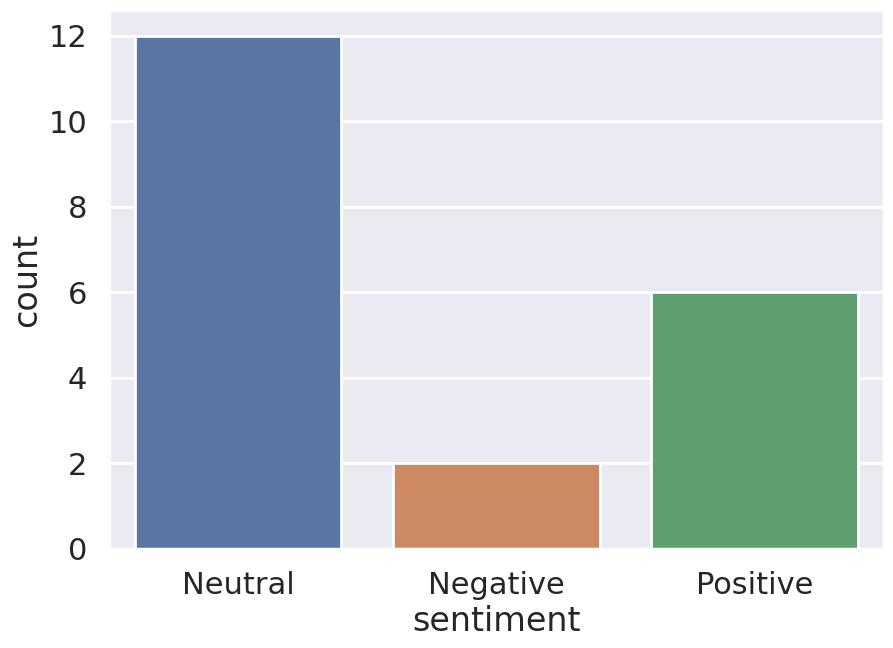

In [45]:
print(earnings_callDF_custom['sentiment'].value_counts())
sns.countplot(x='sentiment', data = earnings_callDF_custom)